Independent of the above analysis, here is an [example online](http://sherrytowers.com/2018/03/07/logistic-binomial-regression/):

In [ ]:
set.seed(541831)
vday = seq(0,2*365) # Two years
vlogit_of_p_predicted = -1 + 0.005 * vday # Linear equation of the log of the odds
vp_predicted = exp(vlogit_of_p_predicted)/(1+exp(vlogit_of_p_predicted)) # The proportion is the prediction: fraction of succ's!
head(vp_predicted)

[1] 0.2689414 0.2699256 0.2709121 0.2719008 0.2728918 0.2738850

In [ ]:
num_guns_found_per_day = 10
wfound_with_round_chambered = numeric(0)
wday_gun_found = numeric(0)
for (i in 1:length(vday)){
  v = rbinom(num_guns_found_per_day,1,vp_predicted[i]) # 10 Bern trials with changing probs's for each day.
  wfound_with_round_chambered = c(wfound_with_round_chambered,v) # Every day the number is appended.
  wday_gun_found = c(wday_gun_found , rep(vday[i],num_guns_found_per_day)) # Each numbered day of 2 years is repeated 10 times.
}

In [ ]:
num_aggregated_ones_per_day = aggregate(wfound_with_round_chambered, by=list(wday_gun_found),FUN="sum") # Successes per day.
num_aggregated_zeros_per_day = aggregate(1-wfound_with_round_chambered, by=list(wday_gun_found),FUN="sum") # Failures per day.

In [ ]:
vday = num_aggregated_ones_per_day[[1]]
vnum_found_with_round_chambered = num_aggregated_ones_per_day[[2]]
vnum_found_without_round_chambered = num_aggregated_zeros_per_day[[2]]
vnum_found = vnum_found_with_round_chambered + vnum_found_without_round_chambered

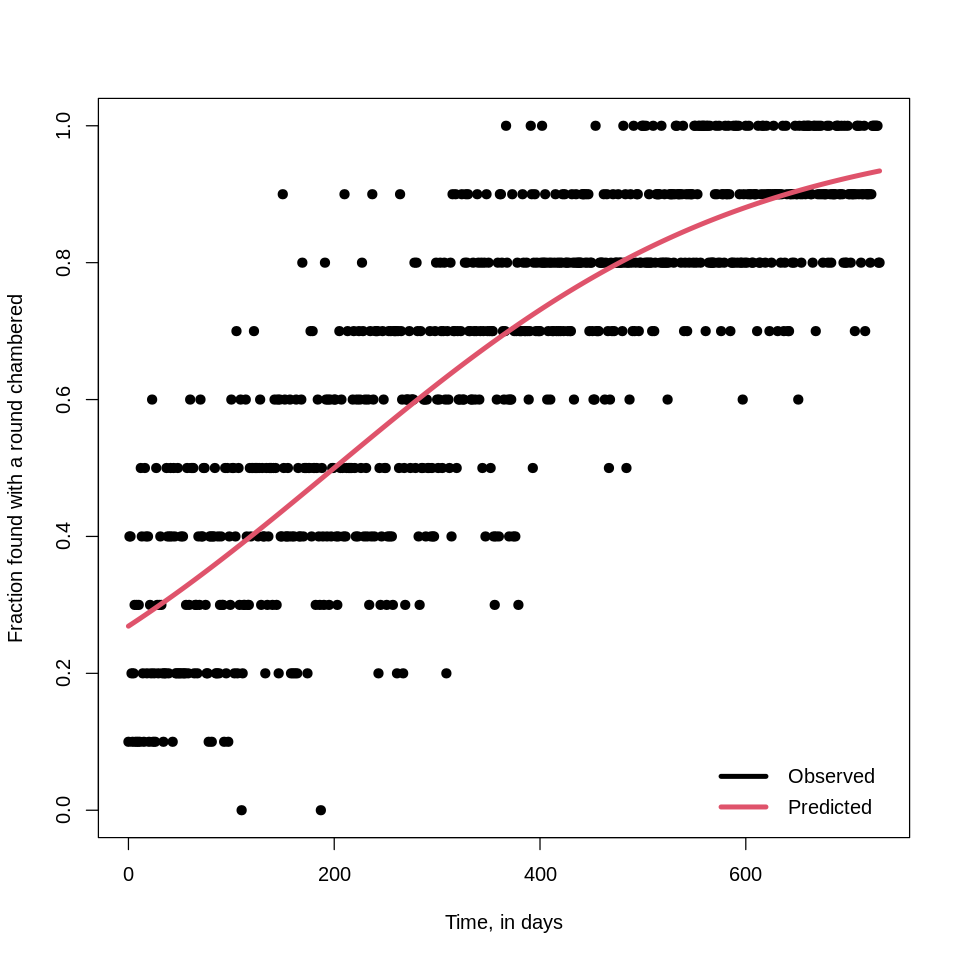

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
vp_observed = vnum_found_with_round_chambered/vnum_found # Fraction observed
plot(vday, vp_observed,xlab="Time, in days",ylab="Fraction found with a round chambered",pch=19)
lines(vday, vp_predicted,lwd=4,col=2) # Fraction predicted as per the generating mechanism.
legend("bottomright",legend=c("Observed","Predicted"),col=c(1,2),lwd=4,bty="n")

In [ ]:
length(vnum_found_with_round_chambered)
length(wfound_with_round_chambered)

[1] 731

[1] 7310

In [ ]:
# Binomial logistic regression:
fit_to_daily_data = glm(cbind(vnum_found_with_round_chambered, vnum_found_without_round_chambered) ~ vday,family="binomial")
# Bernuilli logistic regression:
fit_to_event_data = glm(wfound_with_round_chambered ~ wday_gun_found,family="binomial")

In [ ]:
print(summary(fit_to_daily_data))
print(summary(fit_to_event_data))


Call:
glm(formula = cbind(vnum_found_with_round_chambered, vnum_found_without_round_chambered) ~ 
    vday, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6263  -0.6253   0.0293   0.7733   3.0975  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.0113865  0.0520947  -19.41   <2e-16 ***
vday         0.0050202  0.0001467   34.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2245.8  on 730  degrees of freedom
Residual deviance:  777.3  on 729  degrees of freedom
AIC: 2397.7

Number of Fisher Scoring iterations: 4


Call:
glm(formula = wfound_with_round_chambered ~ wday_gun_found, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3330  -0.9643   0.5013   0.8286   1.6258  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)   

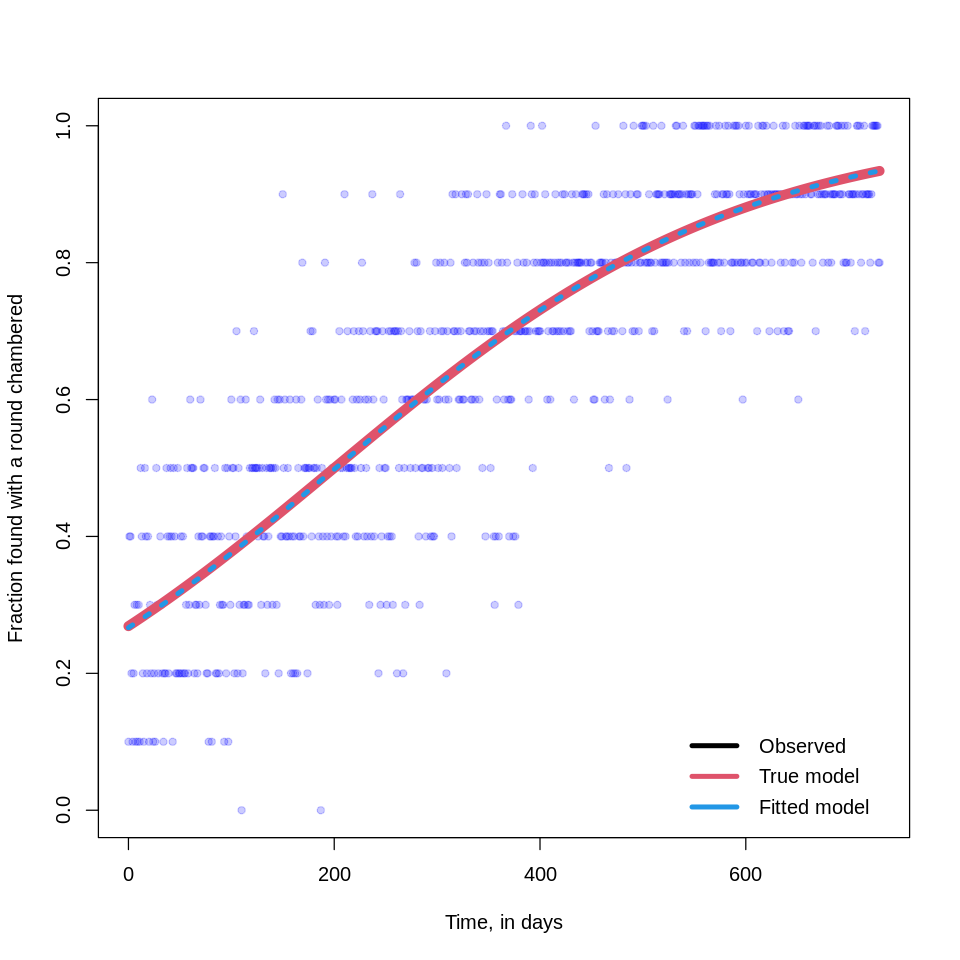

In [ ]:
plot(vday,vp_observed,xlab="Time, in days",ylab="Fraction found with a round chambered", cex=.8,
      pch=19, col=rgb(0,0,1,0.2))
lines(vday,vp_predicted,lwd=8,col=2)
lines(vday,fit_to_daily_data$fit,lwd=4,col=4,lty=3)
legend("bottomright",legend=c("Observed","True model","Fitted model"),col=c(1,2,4),lwd=4,bty="n")